# Análisis Parcial II (customer-details)

### Importamos las librerías que vamos a necesitar

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Añadimos algunos settings para mejorar la visualización de los datos

In [3]:
pd.set_option('display.max_columns', None) # nos enseña todas las columnas
sns.set(style="whitegrid") # ayuda a la hora de insertar gráficos

### Importamos nuestro archivo xlsx

In [14]:
cust_det_2012 = pd.read_excel("../Datos_Proyecto_EDA_Bruto/customer-details.xlsx", sheet_name="2012")
cust_det_2013 = pd.read_excel("../Datos_Proyecto_EDA_Bruto/customer-details.xlsx", sheet_name="2013")
cust_det_2014 = pd.read_excel("../Datos_Proyecto_EDA_Bruto/customer-details.xlsx", sheet_name="2014")

### Añadimos columna del año para identificar de que año viene cada fila

In [15]:
cust_det_2012["Año"] = 2012
cust_det_2013["Año"] = 2013
cust_det_2014["Año"] = 2014

### Concatenamos las 3 hojas para trabajar con ellas en un solo Dataframe

In [16]:
cust_det = pd.concat([cust_det_2012, cust_det_2013, cust_det_2014], ignore_index=True)

### Hacemos una copia del DataFrame original por si necesitamos acceder a algunos datos más adelante

In [89]:
cust_det_copy = cust_det.copy()

### Primer resumen de la forma, tipos de datos y una muestra de los datos que vamos a estudiar

In [97]:
print("Nº de filas y de columnas: ", cust_det.shape)

print("\nTipos de datos: ")
print(cust_det.dtypes)

print("\nMuestra de las primeras 5 filas:")
cust_det.head()

Nº de filas y de columnas:  (43170, 10)

Tipos de datos: 
Income                        int64
Kidhome                       int64
Teenhome                      int64
Dt_Customer          datetime64[ns]
NumWebVisitsMonth             int64
ID                           object
Año                           int64
TotalKids                     int64
recent_customer               int64
TotalHijos                    int64
dtype: object

Muestra de las primeras 5 filas:


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Año,TotalKids,recent_customer,TotalHijos
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,2012,1,0,1
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2012,2,0,2
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012,2,0,2
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,2012,3,0,3
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012,3,0,3


### Primera comprobación de datos nulos y filas duplicadas

In [98]:
print("Valores nulos por columna:", cust_det.isna().sum())

print("\nNº de filas duplicadas:", cust_det.duplicated().sum())

Valores nulos por columna: Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
Año                  0
TotalKids            0
recent_customer      0
TotalHijos           0
dtype: int64

Nº de filas duplicadas: 0


### Primer resumen estadístico

In [21]:
print("Resumen (básico) estadístico por columnas:")
cust_det.describe().T

Resumen (básico) estadístico por columnas:


,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,43170.0,7916.022469,0.0,3597.0,7194.5,11705.75,20114.0,5228.248885
Income,43170.0,93227.389622,5841.0,49608.0,93009.5,136740.5,180802.0,50498.181989
Kidhome,43170.0,1.004749,0.0,0.0,1.0,2.0,2.0,0.815996
Teenhome,43170.0,0.998633,0.0,0.0,1.0,2.0,2.0,0.816008
Dt_Customer,43170,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,16.59129,1.0,9.0,17.0,25.0,32.0,9.241769
Año,43170.0,2012.860435,2012.0,2012.0,2013.0,2014.0,2014.0,0.879132


### Primera limpieza de datos

In [ ]:
# hemos revisado y no existen valores nulos en las columnas, por lo que el trabajo se simplifica mucho

cust_det.drop(columns=['Unnamed: 0'], inplace=True) # la columna 'unnamed' no aporta nada por lo que podemos eliminarla

### Segundo análisis estadístico (más profundo)

In [43]:
print("Análisis estadístico por columnas:")
cust_det.describe(include="all").T

Análisis estadístico por columnas:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Income,43170.0,NaN,NaN,NaN,93227.389622,5841.0,49608.0,93009.5,136740.5,180802.0,50498.181989
Kidhome,43170.0,NaN,NaN,NaN,1.004749,0.0,0.0,1.0,2.0,2.0,0.815996
Teenhome,43170.0,NaN,NaN,NaN,0.998633,0.0,0.0,1.0,2.0,2.0,0.816008
Dt_Customer,43170,NaN,NaN,NaN,2013-05-11 22:09:47.407922176,2012-01-01 00:00:00,2012-07-16 00:00:00,2013-03-01 00:00:00,2014-03-28 00:00:00,2014-12-31 00:00:00,NaN
NumWebVisitsMonth,43170.0,NaN,NaN,NaN,16.59129,1.0,9.0,17.0,25.0,32.0,9.241769
ID,43170,43170,9727bc06-c11a-461a-a5bb-3d210467cc2a,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Año,43170.0,NaN,NaN,NaN,2012.860435,2012.0,2012.0,2013.0,2014.0,2014.0,0.879132


In [37]:
print("Varianza:")
cust_det.var(numeric_only=True)

Varianza:


Income               2.550066e+09
Kidhome              6.658488e-01
Teenhome             6.658695e-01
NumWebVisitsMonth    8.541029e+01
Año                  7.728723e-01
dtype: float64

In [40]:
print("Desviación estándar:")
cust_det.std(numeric_only=True)

Desviación estándar:


Income               50498.181989
Kidhome                  0.815996
Teenhome                 0.816008
NumWebVisitsMonth        9.241769
Año                      0.879132
dtype: float64

In [41]:
print("Media:")
cust_det.median(numeric_only=True)

Media:


Income               93009.5
Kidhome                  1.0
Teenhome                 1.0
NumWebVisitsMonth       17.0
Año                   2013.0
dtype: float64

In [42]:
print("Moda:")
cust_det.mode(numeric_only=True).iloc[0]

Moda:


Income               40655.0
Kidhome                  2.0
Teenhome                 1.0
NumWebVisitsMonth       14.0
Año                   2012.0
Name: 0, dtype: float64

### Gráficas

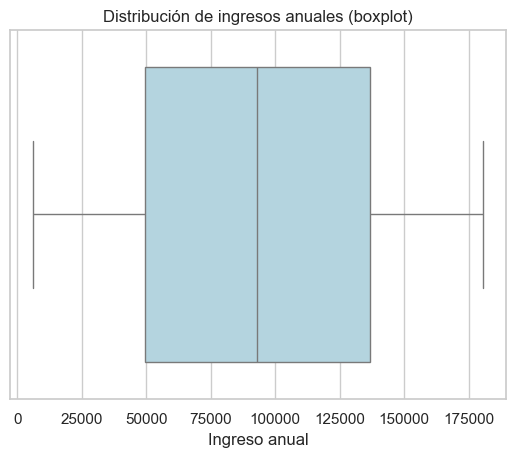

In [74]:
sns.boxplot(x=cust_det["Income"], color="lightblue")
plt.title("Distribución de ingresos anuales (boxplot)")
plt.xlabel("Ingreso anual")
plt.show()

En este boxplot se observa como la mayoría de ingresos anuales de los clientes oscila entre los 50.000 y 137.000 euros, con algunas excepciones y algunos válores máximos cercanos a 180.000 euros, y unos válores mínimos cercanos a los 10.000 euros

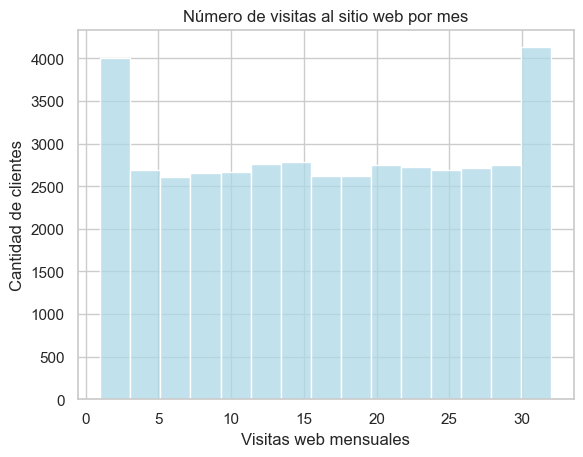

In [95]:
sns.histplot(cust_det["NumWebVisitsMonth"], bins=15, color="lightblue")
plt.title("Número de visitas al sitio web por mes")
plt.xlabel("Visitas web mensuales")
plt.ylabel("Cantidad de clientes")
plt.show()

Es curioso observar como la mayoría de clientes hacen: o muy pocas visitas a la página web, o muchas visitas (en torno a las 30 visitas)

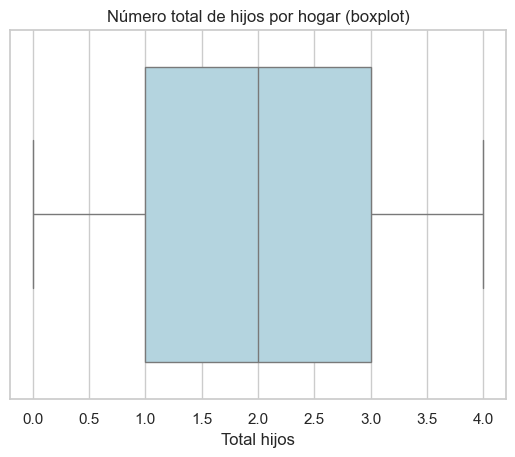

In [96]:
cust_det["TotalHijos"] = cust_det["Kidhome"] + cust_det["Teenhome"]
sns.boxplot(x=cust_det["TotalHijos"], color="lightblue")
plt.title("Número total de hijos por hogar (boxplot)")
plt.xlabel("Total hijos")
plt.show()

La mayoría de clientes tienen entre 1 y 3 hijos, siendo lo normal que tengan 2. Hay excasos clientes con 0 o 4 hijos

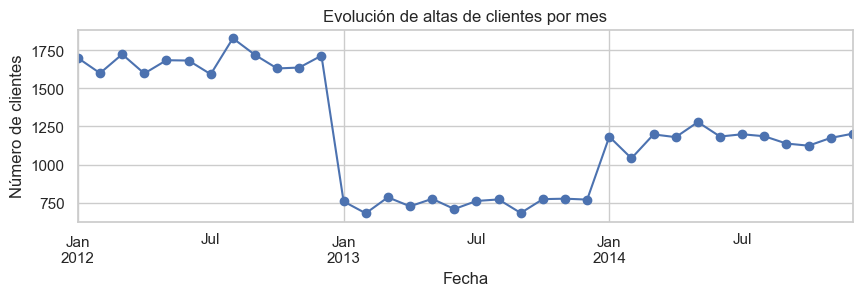

In [ ]:
clientes_por_mes = cust_det.groupby(cust_det["Dt_Customer"].dt.to_period("M")).size()

clientes_por_mes.index = clientes_por_mes.index.to_timestamp()

plt.figure(figsize=(10,2.5))
clientes_por_mes.plot(kind="line", marker="o")
plt.title("Evolución de altas de clientes por mes")
plt.xlabel("Fecha")
plt.ylabel("Número de clientes")
plt.grid(True)
plt.show()

Es curioso como durante el año 2012 hubo un gran número de altas de clientes (cercanas a las 1.600 altas al mes), sin embargo un año depués este número baja mucho (hasta las 700 altas al mes), para en 2014 remontar un poco y situarse en las 1.100 altas de clientes al mes

### Ejemplos de filtrados, agrupaciones y creación de columnas

In [64]:
clientes_altos_ingresos = cust_det[cust_det["Income"] > 150000]  # clientes con ingresos altos

clientes_jovenes = cust_det[cust_det["Dt_Customer"].dt.year > 2015] # clientes que entraron después de 2015

In [90]:
ingreso_promedio_año = cust_det.groupby("Año")["Income"].mean().sort_values(ascending=False) # media de ingresos por año de alta

visitas_por_hijos = cust_det.groupby(["Kidhome", "Teenhome"])["NumWebVisitsMonth"].mean() # promedio de visitas web por número de hijos

In [ ]:
cust_det["TotalKids"] = cust_det["Kidhome"] + cust_det["Teenhome"] # nº total de hijos

cust_det["recent_customer"] = cust_det["Dt_Customer"].apply(lambda x: 1 if x.year > 2017 else 0) # aviso de alta reciente


In [ ]:
clientes_activos = cust_det.query("NumWebVisitsMonth > 20 & TotalKids > 1") # clientes con muchas visitas a la web y con más de un hijo

In [99]:
print("Ingreso promedio por año:\n", ingreso_promedio_año.round(2))

print("\nPromedio de visitas web por número de hijos:\n", visitas_por_hijos.head().round(2))

print("\nClientes con ingresos altos:\n", clientes_altos_ingresos.shape)

print("\nClientes activos:\n", clientes_activos.shape)

Ingreso promedio por año:
 Año
2014    93706.47
2012    93087.21
2013    92788.95
Name: Income, dtype: float64

Promedio de visitas web por número de hijos:
 Kidhome  Teenhome
0        0           16.54
         1           16.73
         2           16.80
1        0           16.47
         1           16.74
Name: NumWebVisitsMonth, dtype: float64

Clientes con ingresos altos:
 (7516, 7)

Clientes activos:
 (10963, 9)


### Visualización del DataFrame tras las limpiezas y optimizaciones

In [87]:
cust_det

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Año,TotalKids,recent_customer,TotalHijos
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,2012,1,0,1
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2012,2,0,2
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012,2,0,2
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,2012,3,0,3
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012,3,0,3
...,...,...,...,...,...,...,...,...,...,...
43165,156980,1,2,2014-05-17,7,5f432048-d515-4bb5-9c94-62db451f88d4,2014,3,0,3
43166,139820,0,0,2014-09-29,1,993bbbd6-4dbc-4a40-a408-f91f8462bee6,2014,0,0,0
43167,78470,2,2,2014-10-28,12,d6271666-319d-42c8-a741-cb22bf2c2093,2014,4,0,4
43168,144218,0,1,2014-07-01,9,f67fbfa8-6573-414d-a805-b26a2f1b1ceb,2014,1,0,1


### CSV con los datos actualizados del DataFrame limpio y optimizado

In [ ]:
cust_det.to_csv("cust_det_clean.csv", index=False) # paso los datos a un archivo csv para poder trabajar con ellos en otro archivo